# Codigo entrada de datos


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


Datos= pd.read_csv("basefinalArreglada.csv")
Datos

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,elo,championName,win,kills,assists,deaths,individualPosition,...,damageDealtToBuildings,damageDealtToObjectives,detectorWardsPlaced,inhibitorTakedowns,neutralMinionsKilled,wardsKilled,wardsPlaced,visionScore,summoner2Id,summoner1Id
0,0,0.0,0,DIAMOND IV,Ornn,True,3,6,5,TOP,...,4010,17599,1,1,4,8,9,26,12,4
1,1,1.0,1,DIAMOND III,FiddleSticks,True,1,12,3,JUNGLE,...,775,19359,4,1,128,12,4,61,4,11
2,2,2.0,2,PLATINUM II,Syndra,True,9,7,5,MIDDLE,...,3510,8377,0,1,4,6,9,18,4,12
3,3,3.0,3,DIAMOND III,Tristana,True,9,4,4,BOTTOM,...,11702,19619,4,1,20,10,11,34,7,4
4,4,4.0,4,DIAMOND IV,Taric,True,1,15,2,UTILITY,...,486,1611,3,1,0,8,23,43,4,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28924,28924,14459.0,1569,unrancked,Pyke,True,8,12,6,UTILITY,...,2326,3954,0,0,6,2,4,10,4,7
28925,28925,14460.0,1570,unrancked,MissFortune,True,7,6,4,UTILITY,...,2969,4964,0,0,0,0,7,11,7,14
28926,28926,14461.0,1571,unrancked,Akshan,True,4,3,3,MIDDLE,...,2660,6525,0,0,4,0,6,6,7,12
28927,28927,14462.0,1572,unrancked,MasterYi,True,4,1,3,JUNGLE,...,601,28349,0,0,116,0,5,8,4,11


# Grafica TOP

Se prepara la base de datos con los individuos "TOP"


In [ ]:
TOP=Datos.loc[Datos["individualPosition"]=="TOP"]
TOP=TOP.replace({"DIAMOND I":"DIAMOND","DIAMOND II":"DIAMOND","DIAMOND III":"DIAMOND","DIAMOND IV":"DIAMOND",
                  "PLATINUM I":"PLATINUM","PLATINUM II":"PLATINUM","PLATINUM III":"PLATINUM","PLATINUM IV":"PLATINUM",
                  "GOLD I":"GOLD","GOLD II":"GOLD","GOLD III":"GOLD","GOLD IV":"GOLD",
                  "SILVER I":"SILVER","SILVER II":"SILVER","SILVER III":"SILVER","SILVER IV":"SILVER",
                  "BRONZE I":"BRONZE","BRONZE II":"BRONZE","BRONZE III":"BRONZE","BRONZE IV":"BRONZE",
                  "IRON I":"IRON","IRON II":"IRON","IRON III":"IRON","IRON IV":"IRON"
                  

                  })

In [ ]:
X=TOP[["kills","assists","deaths","totalMinionsKilled","goldEarned","dragonKills",
         "totalDamageDealtToChampions","totalDamageTaken","turretTakedowns","baronKills",
         "damageDealtToBuildings","damageDealtToObjectives","detectorWardsPlaced","inhibitorTakedowns","neutralMinionsKilled",
         "wardsKilled","wardsPlaced","visionScore"]]
y=TOP[["elo"]]



#Preparacion de los datos con reduccion de la dimencionalidad 

In [ ]:
# presentacion 
from sklearn.model_selection import train_test_split

# separo train y prueba
X_train, X_test, y_train, y_test =train_test_split(X, y,train_size=0.8,test_size=0.2)

import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X_train)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(sum(pca.explained_variance_ratio_))
x_train = pca.fit_transform(X_train)
x_test = pca.fit_transform(X_test)
print(len(x_test),len(x_train))

Defino el algoritmo del modelo

In [ ]:
# defino algoritmo

from sklearn.svm import  SVC
algoritmo = SVC(kernel="rbf")

Se entrena el modelo de predicción

In [ ]:
# Entreno modelo
algoritmo.fit(X_train, y_train)

# realizo una prediccion

y_pred = algoritmo.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Matriz de confusion 

Matriz = confusion_matrix(y_test,y_pred)
print(Matriz)


[[ 31   0   0 120   0   0   0   0   0   0]
 [  0   0   0   6   0   0   0   0   0   0]
 [ 42   0   0 150   0   0   0   0   0   0]
 [ 34   0   1 212   0   0   0   0   0   0]
 [  6   0   0   7   0   0   0   0   0   0]
 [ 14   0   0  34   0   0   0   0   0   0]
 [ 10   0   0  56   0   0   0   0   0   0]
 [ 27   0   1 136   0   0   0   1   2   0]
 [ 32   0   0 141   0   0   0   0   0   0]
 [ 18   0   0  64   0   0   0   0   0   0]]


In [ ]:
from sklearn.metrics import precision_score
presicion = precision_score(y_test, y_pred,average="micro")

print(presicion)

0.2131004366812227


In [ ]:
from string import ascii_uppercase
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columnas=["%s" %(i) for i in list(TOP["elo"].value_counts().keys().tolist())[0:10]]

df_cm=pd.DataFrame(Matriz,index=columnas,columns=columnas)

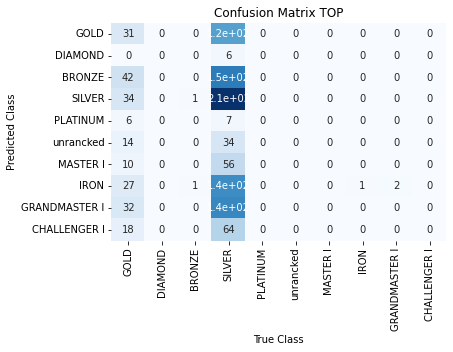

In [ ]:
grafica = sns.heatmap(df_cm,cbar=None,cmap="Blues",annot=True)

plt.ylabel("valores verdaderos")
plt.xlabel("predicciones")
plt.title("Confusion Matrix TOP")
grafica.set(xlabel="True Class",ylabel="Predicted Class")
plt.show()

Así como se realizó con la categoria TOP, se hacen las demás divisiones con las categorias restantes.

# Graficas UTILITY

In [ ]:
UTILITY=Datos.loc[Datos["individualPosition"]=="UTILITY"]
UTILITY=UTILITY.replace({"DIAMOND I":"DIAMOND","DIAMOND II":"DIAMOND","DIAMOND III":"DIAMOND","DIAMOND IV":"DIAMOND",
                  "PLATINUM I":"PLATINUM","PLATINUM II":"PLATINUM","PLATINUM III":"PLATINUM","PLATINUM IV":"PLATINUM",
                  "GOLD I":"GOLD","GOLD II":"GOLD","GOLD III":"GOLD","GOLD IV":"GOLD",
                  "SILVER I":"SILVER","SILVER II":"SILVER","SILVER III":"SILVER","SILVER IV":"SILVER",
                  "BRONZE I":"BRONZE","BRONZE II":"BRONZE","BRONZE III":"BRONZE","BRONZE IV":"BRONZE",
                  "IRON I":"IRON","IRON II":"IRON","IRON III":"IRON","IRON IV":"IRON"
                  

                  })


X=UTILITY[["kills","assists","deaths","totalMinionsKilled","goldEarned","dragonKills",
         "totalDamageDealtToChampions","totalDamageTaken","turretTakedowns","baronKills",
         "damageDealtToBuildings","damageDealtToObjectives","detectorWardsPlaced","inhibitorTakedowns","neutralMinionsKilled",
         "wardsKilled","wardsPlaced","visionScore"]]
y=UTILITY[["elo"]]




# presentacion 
from sklearn.model_selection import train_test_split

# separo train y prueba
X_train, X_test, y_train, y_test =train_test_split(X, y,train_size=0.8,test_size=0.2)


import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X_train)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(sum(pca.explained_variance_ratio_))
x_train = pca.fit_transform(X_train)
x_test = pca.fit_transform(X_test)
print(len(x_test),len(x_train))

# defino algoritmo

from sklearn.svm import  SVC
algoritmo = SVC(kernel="rbf")



# Entreno modelo
algoritmo.fit(X_train, y_train)

# realizo una prediccion

y_pred = algoritmo.predict(X_test)


# Matriz de confusion 

Matriz = confusion_matrix(y_test,y_pred)
print(Matriz)




from sklearn.metrics import precision_score
presicion = precision_score(y_test, y_pred,average="micro")

print(presicion)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 20   0  47 107   0   0   0   0   9   0]
 [  0   0   2   1   0   0   0   0   0   0]
 [  5   0  81  81   0   0   0   0   6   0]
 [ 19   0  62 138   0   0   0   0   7   0]
 [  0   0   8   4   0   0   0   0   0   0]
 [  3   0  10  26   0   0   0   0   6   0]
 [  1   0  31  26   0   0   0   0   0   0]
 [  9   0  51  83   0   0   0   0   6   0]
 [  6   0  71 109   0   0   0   1  22   0]
 [  3   0  40  46   0   0   0   0   5   0]]
0.2265625


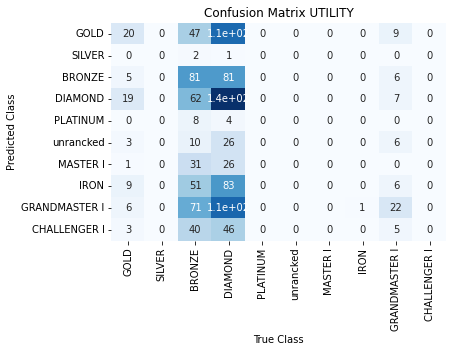

In [ ]:
from string import ascii_uppercase
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columnas=["%s" %(i) for i in list(UTILITY["elo"].value_counts().keys().tolist())[0:10]]

df_cm=pd.DataFrame(Matriz,index=columnas,columns=columnas)




grafica = sns.heatmap(df_cm,cbar=None,cmap="Blues",annot=True)

plt.ylabel("valores verdaderos")
plt.xlabel("predicciones")
plt.title("Confusion Matrix UTILITY")
grafica.set(xlabel="True Class",ylabel="Predicted Class")
plt.show()

# Grafica JUNGLE

In [ ]:
JUNGLE=Datos.loc[Datos["individualPosition"]=="JUNGLE"]
JUNGLE=JUNGLE.replace({"DIAMOND I":"DIAMOND","DIAMOND II":"DIAMOND","DIAMOND III":"DIAMOND","DIAMOND IV":"DIAMOND",
                  "PLATINUM I":"PLATINUM","PLATINUM II":"PLATINUM","PLATINUM III":"PLATINUM","PLATINUM IV":"PLATINUM",
                  "GOLD I":"GOLD","GOLD II":"GOLD","GOLD III":"GOLD","GOLD IV":"GOLD",
                  "SILVER I":"SILVER","SILVER II":"SILVER","SILVER III":"SILVER","SILVER IV":"SILVER",
                  "BRONZE I":"BRONZE","BRONZE II":"BRONZE","BRONZE III":"BRONZE","BRONZE IV":"BRONZE",
                  "IRON I":"IRON","IRON II":"IRON","IRON III":"IRON","IRON IV":"IRON"
                  

                  })


X=JUNGLE[["kills","assists","deaths","totalMinionsKilled","goldEarned","dragonKills",
         "totalDamageDealtToChampions","totalDamageTaken","turretTakedowns","baronKills",
         "damageDealtToBuildings","damageDealtToObjectives","detectorWardsPlaced","inhibitorTakedowns","neutralMinionsKilled",
         "wardsKilled","wardsPlaced","visionScore"]]
y=JUNGLE[["elo"]]




# presentacion 
from sklearn.model_selection import train_test_split

# separo train y prueba
X_train, X_test, y_train, y_test =train_test_split(X, y,train_size=0.8,test_size=0.2)

import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X_train)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(sum(pca.explained_variance_ratio_))
x_train = pca.fit_transform(X_train)
x_test = pca.fit_transform(X_test)
print(len(x_test),len(x_train))


# defino algoritmo

from sklearn.svm import  SVC
algoritmo = SVC(kernel="rbf")



# Entreno modelo
algoritmo.fit(X_train, y_train)

# realizo una prediccion

y_pred = algoritmo.predict(X_test)


# Matriz de confusion 

Matriz = confusion_matrix(y_test,y_pred)
print(Matriz)




from sklearn.metrics import precision_score
presicion = precision_score(y_test, y_pred,average="micro")

print(presicion)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 61   0  54  67   0   0   0   0   1   0]
 [  1   0   0   2   0   0   0   0   0   0]
 [ 38   0  67  58   0   0   0   0   4   0]
 [ 42   0  47 115   0   0   0   0   1   0]
 [  5   0  11   5   0   0   0   0   0   0]
 [ 24   0  12  26   0   0   0   0   0   0]
 [ 10   0  28  27   0   0   0   0   3   0]
 [ 42   0  56  91   0   0   0   0   2   0]
 [ 55   0  54  91   0   0   0   0   2   0]
 [ 35   0  14  46   0   0   0   0   4   0]]
0.20399666944213155


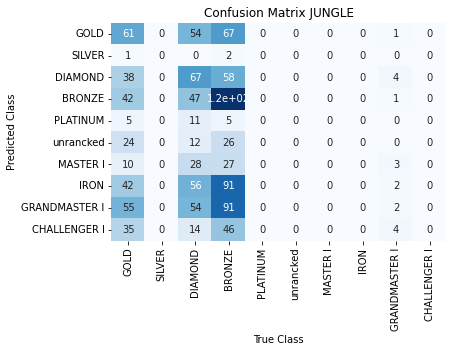

In [ ]:
from string import ascii_uppercase
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columnas=["%s" %(i) for i in list(JUNGLE["elo"].value_counts().keys().tolist())[0:10]]

df_cm=pd.DataFrame(Matriz,index=columnas,columns=columnas)




grafica = sns.heatmap(df_cm,cbar=None,cmap="Blues",annot=True)

plt.ylabel("valores verdaderos")
plt.xlabel("predicciones")
plt.title("Confusion Matrix JUNGLE")
grafica.set(xlabel="True Class",ylabel="Predicted Class")
plt.show()

# Grafica MIDDLE

In [ ]:
MIDDLE=Datos.loc[Datos["individualPosition"]=="MIDDLE"]
MIDDLE=JUNGLE.replace({"DIAMOND I":"DIAMOND","DIAMOND II":"DIAMOND","DIAMOND III":"DIAMOND","DIAMOND IV":"DIAMOND",
                  "PLATINUM I":"PLATINUM","PLATINUM II":"PLATINUM","PLATINUM III":"PLATINUM","PLATINUM IV":"PLATINUM",
                  "GOLD I":"GOLD","GOLD II":"GOLD","GOLD III":"GOLD","GOLD IV":"GOLD",
                  "SILVER I":"SILVER","SILVER II":"SILVER","SILVER III":"SILVER","SILVER IV":"SILVER",
                  "BRONZE I":"BRONZE","BRONZE II":"BRONZE","BRONZE III":"BRONZE","BRONZE IV":"BRONZE",
                  "IRON I":"IRON","IRON II":"IRON","IRON III":"IRON","IRON IV":"IRON"
                  

                  })


X=MIDDLE[["kills","assists","deaths","totalMinionsKilled","goldEarned","dragonKills",
         "totalDamageDealtToChampions","totalDamageTaken","turretTakedowns","baronKills",
         "damageDealtToBuildings","damageDealtToObjectives","detectorWardsPlaced","inhibitorTakedowns","neutralMinionsKilled",
         "wardsKilled","wardsPlaced","visionScore"]]
y=MIDDLE[["elo"]]




# presentacion 
from sklearn.model_selection import train_test_split

# separo train y prueba
X_train, X_test, y_train, y_test =train_test_split(X, y,train_size=0.8,test_size=0.2)

import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X_train)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(sum(pca.explained_variance_ratio_))
x_train = pca.fit_transform(X_train)
x_test = pca.fit_transform(X_test)
print(len(x_test),len(x_train))


# defino algoritmo

from sklearn.svm import  SVC
algoritmo = SVC(kernel="rbf")



# Entreno modelo
algoritmo.fit(X_train, y_train)

# realizo una prediccion

y_pred = algoritmo.predict(X_test)


# Matriz de confusion 

Matriz = confusion_matrix(y_test,y_pred)
print(Matriz)




from sklearn.metrics import precision_score
presicion = precision_score(y_test, y_pred,average="micro")

print(presicion)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 53   0  45  59   0   0   0  11   7   0]
 [  4   0   2   2   0   0   0   0   0   0]
 [ 41   0  71  55   0   0   0   9  11   0]
 [ 46   0  43 115   0   0   0  11   9   0]
 [  2   0   9   2   0   0   0   1   1   0]
 [ 21   0   8  21   0   0   0   2   3   0]
 [ 10   0  25  21   0   0   0   3   1   0]
 [ 38   0  42  75   0   0   0  13   6   0]
 [ 56   0  51  79   0   0   0  11   8   0]
 [ 33   0  18  33   0   0   0   6   8   0]]
0.21648626144879268


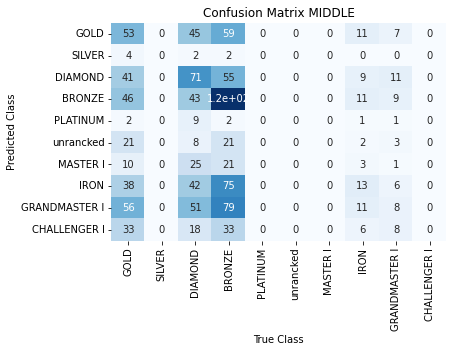

In [ ]:
from string import ascii_uppercase
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columnas=["%s" %(i) for i in list(MIDDLE["elo"].value_counts().keys().tolist())[0:10]]

df_cm=pd.DataFrame(Matriz,index=columnas,columns=columnas)




grafica = sns.heatmap(df_cm,cbar=None,cmap="Blues",annot=True)

plt.ylabel("valores verdaderos")
plt.xlabel("predicciones")
plt.title("Confusion Matrix MIDDLE")
grafica.set(xlabel="True Class",ylabel="Predicted Class")
plt.show()

# Grafica BOTTOM

In [ ]:
BOTTOM=Datos.loc[Datos["individualPosition"]=="BOTTOM"]
BOTTOM=BOTTOM.replace({"DIAMOND I":"DIAMOND","DIAMOND II":"DIAMOND","DIAMOND III":"DIAMOND","DIAMOND IV":"DIAMOND",
                  "PLATINUM I":"PLATINUM","PLATINUM II":"PLATINUM","PLATINUM III":"PLATINUM","PLATINUM IV":"PLATINUM",
                  "GOLD I":"GOLD","GOLD II":"GOLD","GOLD III":"GOLD","GOLD IV":"GOLD",
                  "SILVER I":"SILVER","SILVER II":"SILVER","SILVER III":"SILVER","SILVER IV":"SILVER",
                  "BRONZE I":"BRONZE","BRONZE II":"BRONZE","BRONZE III":"BRONZE","BRONZE IV":"BRONZE",
                  "IRON I":"IRON","IRON II":"IRON","IRON III":"IRON","IRON IV":"IRON"
                  

                  })


X=BOTTOM[["kills","assists","deaths","totalMinionsKilled","goldEarned","dragonKills",
         "totalDamageDealtToChampions","totalDamageTaken","turretTakedowns","baronKills",
         "damageDealtToBuildings","damageDealtToObjectives","detectorWardsPlaced","inhibitorTakedowns","neutralMinionsKilled",
         "wardsKilled","wardsPlaced","visionScore"]]
y=BOTTOM[["elo"]]




# presentacion 
from sklearn.model_selection import train_test_split

# separo train y prueba
X_train, X_test, y_train, y_test =train_test_split(X, y,train_size=0.8,test_size=0.2)


import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X_train)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(sum(pca.explained_variance_ratio_))
x_train = pca.fit_transform(X_train)
x_test = pca.fit_transform(X_test)
print(len(x_test),len(x_train))

# defino algoritmo

from sklearn.svm import  SVC
algoritmo = SVC(kernel="rbf")



# Entreno modelo
algoritmo.fit(X_train, y_train)

# realizo una prediccion

y_pred = algoritmo.predict(X_test)


# Matriz de confusion 

Matriz = confusion_matrix(y_test,y_pred)
print(Matriz)




from sklearn.metrics import precision_score
presicion = precision_score(y_test, y_pred,average="micro")

print(presicion)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[  0   0  21 117   0   0   0   9   2   0]
 [  0   0   1   4   0   0   0   0   0   0]
 [  0   0  34 135   0   0   0  20   1   0]
 [  0   0  34 171   0   0   0  16   5   0]
 [  0   0   2  13   0   0   0   1   0   0]
 [  1   0   5  47   0   0   0   3   0   0]
 [  0   0  17  38   0   0   0   7   1   0]
 [  0   0  38 120   0   0   0  23   3   0]
 [  2   0  30 131   0   0   0  11   0   0]
 [  0   0  11  54   0   0   0   4   0   0]]
0.20141342756183744


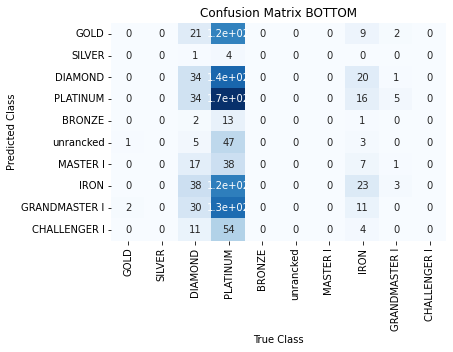

In [ ]:
from string import ascii_uppercase
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columnas=["%s" %(i) for i in list(BOTTOM["elo"].value_counts().keys().tolist())[0:10]]

df_cm=pd.DataFrame(Matriz,index=columnas,columns=columnas)




grafica = sns.heatmap(df_cm,cbar=None,cmap="Blues",annot=True)

plt.ylabel("valores verdaderos")
plt.xlabel("predicciones")
plt.title("Confusion Matrix BOTTOM")
grafica.set(xlabel="True Class",ylabel="Predicted Class")
plt.show()